In [1]:
# 배열의 크기, 반복 횟수 설정
sizes = [
    100, 250, 500, 750, 
    1000, 2500, 5000, 7500, 
    10000, 25000, 50000, 75000, 
    100000, 250000, 500000, 750000,
    1000000
]  # 배열의 크기

SIZE = sizes[-1] # 1,000,000
THRESHODE_RANGE = 250
iterations = 5 # 각 크기별 평균을 내기 위해 반복할 횟수

thresholds = list(range(THRESHODE_RANGE)) # threshold의 범위를 0 ~ 249까지 지정
''' 
    c로 만든 두 가지 정렬(normal Quicksort, threshold used Quicksort)의 시간을 구해 파일에 추가하는 어플리케이션을
    위 두 가지 sizes, iterations을 사용하여, 반복해서 값을 구한다.
'''
for threshold in thresholds:
    for _ in range(iterations):
        !../main.out {SIZE} {threshold}

Qiucksort: elapsed time: 135 milliseconds
threshold used Qiucksort: elapsed time: 151 milliseconds
Qiucksort: elapsed time: 147 milliseconds
threshold used Qiucksort: elapsed time: 144 milliseconds
Qiucksort: elapsed time: 141 milliseconds
threshold used Qiucksort: elapsed time: 147 milliseconds
Qiucksort: elapsed time: 133 milliseconds
threshold used Qiucksort: elapsed time: 142 milliseconds
Qiucksort: elapsed time: 142 milliseconds
threshold used Qiucksort: elapsed time: 142 milliseconds
Qiucksort: elapsed time: 138 milliseconds
threshold used Qiucksort: elapsed time: 129 milliseconds
Qiucksort: elapsed time: 143 milliseconds
threshold used Qiucksort: elapsed time: 127 milliseconds
Qiucksort: elapsed time: 132 milliseconds
threshold used Qiucksort: elapsed time: 130 milliseconds
Qiucksort: elapsed time: 127 milliseconds
threshold used Qiucksort: elapsed time: 139 milliseconds
Qiucksort: elapsed time: 131 milliseconds
threshold used Qiucksort: elapsed time: 135 milliseconds
Qiucksort:

In [2]:
'''
    위에서 구한 정렬 시간을 저장한 파일을 가져와서 딕셔너리에 담는다.
'''
# 시간의 합을 저장할 딕셔너리 컨테이너
threshold_used_sort_times = {}

# c 어플리케이션 main.out으로 생성, 추가된 파일 'Quicksort_threshold.txt'를 가져와 한 줄 씩 읽는다.
with open('Quicksort_threshold.txt', 'r') as f:
    # '/n'문자을 기준으로 한 줄씩 가져와 읽는다.
    for line in f:
        size, threshold, quick_sort_time, threshold_used_sort_time = map(int, line.strip().split()) 
                                                                    # .strip(): 양쪽 '\n'문자 제거 
                                                                    # .split(): ' '를 기준으로, 토큰화
        # 딕셔너리 컨테이너에 있는지 현재 크기의 시간 데이터가 있는지 확인
        # 없으면 추가                                            
        if threshold_used_sort_times.get(threshold) == None:
            threshold_used_sort_times[threshold] = threshold_used_sort_time
        # 있으면 합쳐준다.
        else:
            threshold_used_sort_times[threshold] += threshold_used_sort_time
            
# 결과 각 sizes(N)의 배열을 정렬할 때 걸리는 시간의 합을 저장하는 딕셔너리를 얻을 수 있다.
print(f"threshold_used_sort_times: {threshold_used_sort_times}")

threshold_used_sort_times: {0: 726, 1: 660, 2: 650, 3: 656, 4: 638, 5: 673, 6: 693, 7: 639, 8: 656, 9: 667, 10: 657, 11: 673, 12: 663, 13: 633, 14: 643, 15: 637, 16: 664, 17: 641, 18: 656, 19: 647, 20: 609, 21: 616, 22: 612, 23: 621, 24: 612, 25: 619, 26: 629, 27: 634, 28: 631, 29: 620, 30: 650, 31: 652, 32: 635, 33: 617, 34: 616, 35: 655, 36: 656, 37: 624, 38: 621, 39: 674, 40: 1117, 41: 655, 42: 662, 43: 655, 44: 632, 45: 617, 46: 640, 47: 632, 48: 641, 49: 631, 50: 603, 51: 633, 52: 635, 53: 666, 54: 796, 55: 717, 56: 637, 57: 673, 58: 639, 59: 662, 60: 643, 61: 636, 62: 634, 63: 670, 64: 673, 65: 678, 66: 639, 67: 628, 68: 617, 69: 687, 70: 684, 71: 657, 72: 671, 73: 684, 74: 682, 75: 688, 76: 665, 77: 668, 78: 737, 79: 725, 80: 694, 81: 670, 82: 671, 83: 705, 84: 671, 85: 711, 86: 708, 87: 649, 88: 659, 89: 707, 90: 690, 91: 710, 92: 698, 93: 691, 94: 720, 95: 700, 96: 734, 97: 720, 98: 689, 99: 698, 100: 728, 101: 742, 102: 1214, 103: 730, 104: 728, 105: 709, 106: 1244, 107: 752,

In [3]:
# 딕셔너리에 저장된 정렬 시간의 평균을 구하는 함수
def average(times: dict, iterations: int) -> list:
    time_average_list: list = []
    for size, sum_time in times.items():
        average: float = sum_time / iterations
        time_average_list.append(average)
    return time_average_list

In [4]:
# quick_sort_average = average(quick_sort_times, iterations)
threshold_used_sort_average = average(threshold_used_sort_times, iterations)

# print(f"quick_sort_average: {quick_sort_average}")
print(f"threshold_used_sort_average: {threshold_used_sort_average}")

threshold_used_sort_average: [145.2, 132.0, 130.0, 131.2, 127.6, 134.6, 138.6, 127.8, 131.2, 133.4, 131.4, 134.6, 132.6, 126.6, 128.6, 127.4, 132.8, 128.2, 131.2, 129.4, 121.8, 123.2, 122.4, 124.2, 122.4, 123.8, 125.8, 126.8, 126.2, 124.0, 130.0, 130.4, 127.0, 123.4, 123.2, 131.0, 131.2, 124.8, 124.2, 134.8, 223.4, 131.0, 132.4, 131.0, 126.4, 123.4, 128.0, 126.4, 128.2, 126.2, 120.6, 126.6, 127.0, 133.2, 159.2, 143.4, 127.4, 134.6, 127.8, 132.4, 128.6, 127.2, 126.8, 134.0, 134.6, 135.6, 127.8, 125.6, 123.4, 137.4, 136.8, 131.4, 134.2, 136.8, 136.4, 137.6, 133.0, 133.6, 147.4, 145.0, 138.8, 134.0, 134.2, 141.0, 134.2, 142.2, 141.6, 129.8, 131.8, 141.4, 138.0, 142.0, 139.6, 138.2, 144.0, 140.0, 146.8, 144.0, 137.8, 139.6, 145.6, 148.4, 242.8, 146.0, 145.6, 141.8, 248.8, 150.4, 141.4, 146.2, 156.4, 148.2, 140.2, 145.0, 148.2, 139.8, 147.2, 141.0, 132.2, 130.6, 128.8, 130.8, 133.4, 128.6, 132.4, 131.4, 130.2, 129.6, 126.2, 128.6, 131.0, 127.0, 189.2, 126.6, 125.2, 125.2, 127.4, 126.0, 125.

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50651/2608272592.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


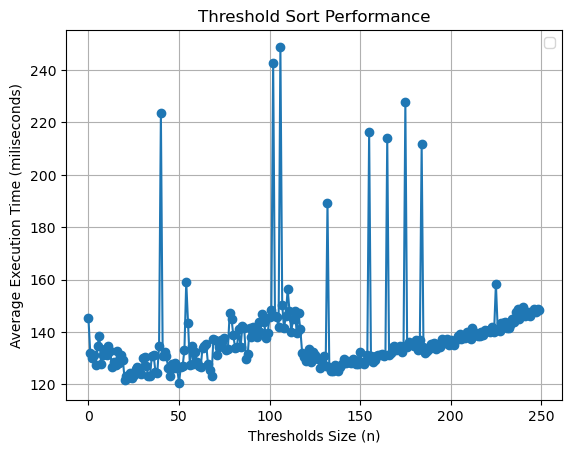

In [5]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 1,000,000, 임계값: 0-249 반복횟수: 5       
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (n)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 그래프의 범위를 좁혀 유의미한 임계값의 범위를 찾아간다.
thresholds = thresholds[:100] 
threshold_used_sort_average = threshold_used_sort_average[:100]

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50651/18025225.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


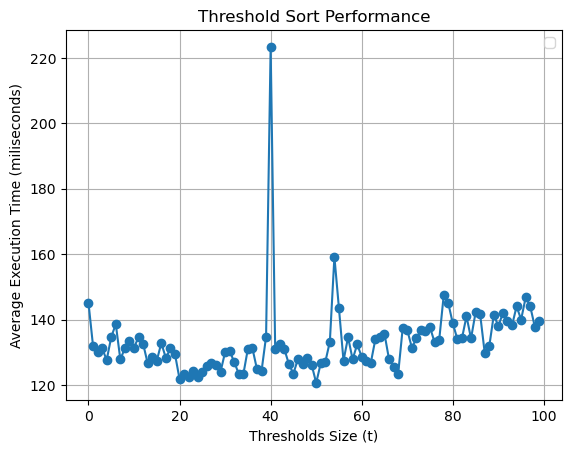

In [7]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 1,000,000, 임계값: 0-(100 - 1) 반복횟수: 5        
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (t)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()